In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

### Read dataset and perform sanity checks

In [2]:
df = pd.read_csv('../inputs/day.csv')
df.shape

(730, 16)

The dataset composed of 730 records and 16 features

Explore features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset is clean with no missing values

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Decode features

In [6]:
## Data maps
season_map      = {1 : 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
year_map        = {0 : 2018, 1: 2019}
month_map       = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
holiday_map     = {0 : 'not holiday', 1: 'holiday'}
weekday_map     = {0 : 'Tuesday', 1 : 'Wednesday', 2 : 'Thursday', 3 : 'Friday', 4: 'Saturday', 5 : 'Sunday', 6: 'Monday'}
workingday_map  = {0 : 'Working day', 1 : 'Weekend or holiday'}
weathersit_map  = {1 : 'Clear', 2 : 'Mist', 3 : 'Light rain', 4: 'Heavy rain'}

In [7]:
# apply
df['season']     = df['season'].map(season_map)
df['yr']         = df['yr'].map(year_map)
df['mnth']       = df['mnth'].map(month_map)
df['holiday']    = df['holiday'].map(holiday_map)
df['weekday']    = df['weekday'].map(weekday_map)
df['workingday'] = df['workingday'].map(workingday_map)
df['weathersit'] = df['weathersit'].map(weathersit_map)

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'], format = '%d-%m-%Y')

In [9]:
# show sample samples
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,not holiday,Monday,Working day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Jan,not holiday,Tuesday,Working day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,Jan,not holiday,Wednesday,Weekend or holiday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,Jan,not holiday,Thursday,Weekend or holiday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,Jan,not holiday,Friday,Weekend or holiday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Exploratory data analysis

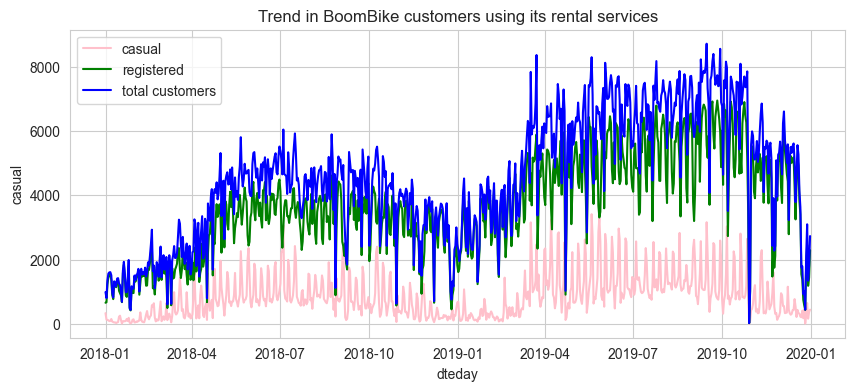

In [10]:
plt.figure(figsize=(10, 4))
sns.lineplot(data = df, x = 'dteday', y = 'casual', label = 'casual', color = 'pink')
sns.lineplot(data = df, x = 'dteday', y = 'registered', label = 'registered', color = 'green')
sns.lineplot(data = df, x = 'dteday', y = 'cnt', label = 'total customers', color = 'blue')
plt.title('Trend in BoomBike customers using its rental services')
plt.show()

From the above trend plot, we can observe that there exists a trend across the year and also with in a week, peaking at regular intervals. The trend is same for both the causal and registered customers. 

The consumer trend is consistant between the year, where there exists a gradual increase from the beginning of the year and drops at the similar rate before peaking in around June.

In the last quarter of 2019, the volatility is high among the registered consumers and it might align with Covid-19. 

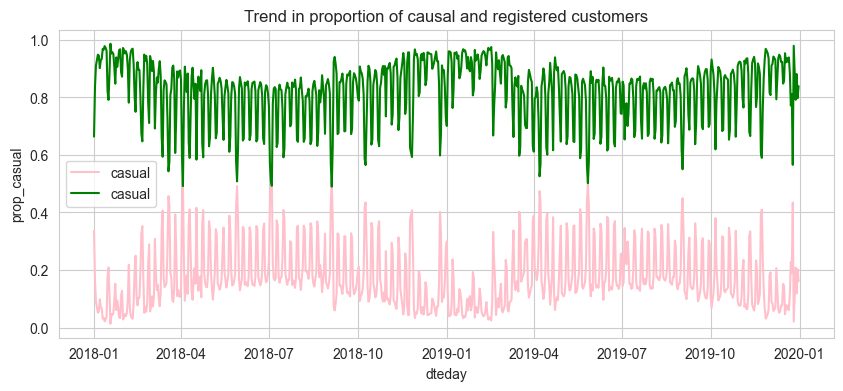

In [11]:
plt.figure(figsize=(10, 4))
df['prop_casual']       = df['casual'] / df['cnt']
df['prop_registered']   = df['registered'] / df['cnt']
sns.lineplot(data = df, x = 'dteday', y = 'prop_casual', color = 'pink', label = 'casual')
sns.lineplot(data = df, x = 'dteday', y = 'prop_registered', color = 'green', label = 'casual')
plt.title('Trend in proportion of causal and registered customers')
plt.show()

From the earlier trend plot, we observed that the total customer are high between May and August and low on the beginning and end of the year. The relationship between causal and registered customer are inverse throughout the year. Registered customers are domninated when the business is not active, and nearly equal contribution in the middle-phase.

If we assume casual customer are impluse gover and they might take decision on season and weather conditions (entire premises of the project.)

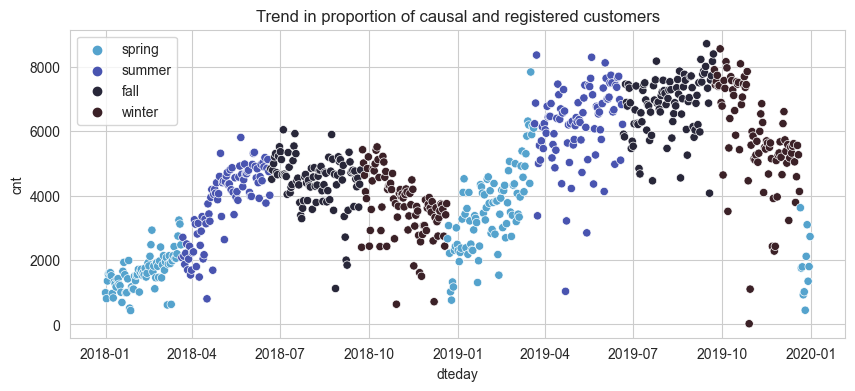

In [12]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data = df, x = 'dteday', y = 'cnt', hue = 'season')
plt.title('Trend in proportion of causal and registered customers')
plt.legend()
plt.show()

There is strong seasonality effect on the customer opting for the BoomBikes rentel services. Customer activity in the Spring is low but with positive trend. The trend continues into the summer and remain stable in the fall. In the winter, because of shape drop in temperature and adverse weather conditions, the customer activity drops. As discussed earlier, the sharpe drop in the late 2019 might also related to emergence of Covid-19.

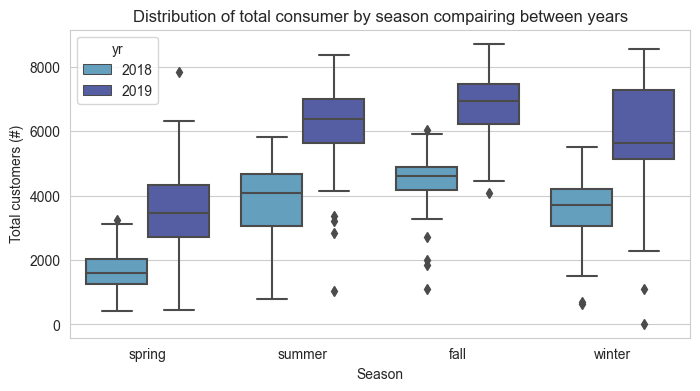

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(data = df, x = 'season', y = 'cnt', hue = 'yr')
plt.title('Distribution of total consumer by season compairing between years')
plt.xlabel('Season')
plt.ylabel('Total customers (#)')
plt.show()

Across all the seasons, the total customer increased in 2019 compared to 2018.

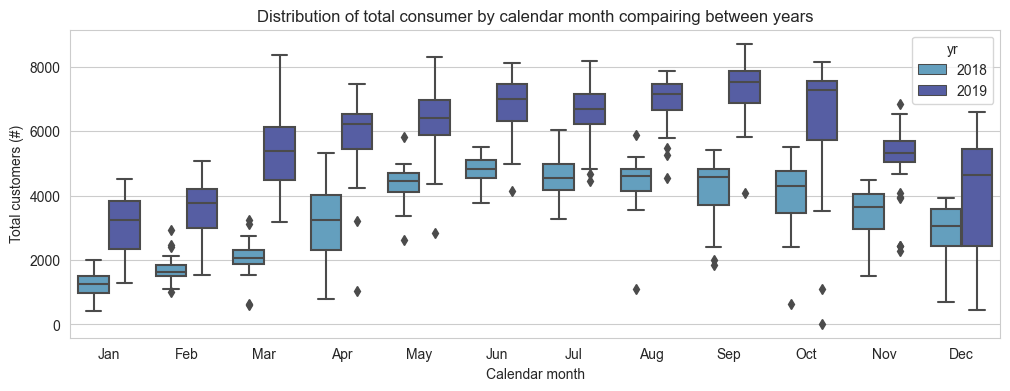

In [14]:
plt.figure(figsize=(12, 4))
sns.boxplot(data = df, x = 'mnth', y = 'cnt', hue = 'yr')
plt.title('Distribution of total consumer by calendar month compairing between years')
plt.xlabel('Calendar month')
plt.ylabel('Total customers (#)')
plt.show()

Not suprisingly, the trend is same as season. The emergence of Covid-19 might have influence for high variance in Dec 2019.

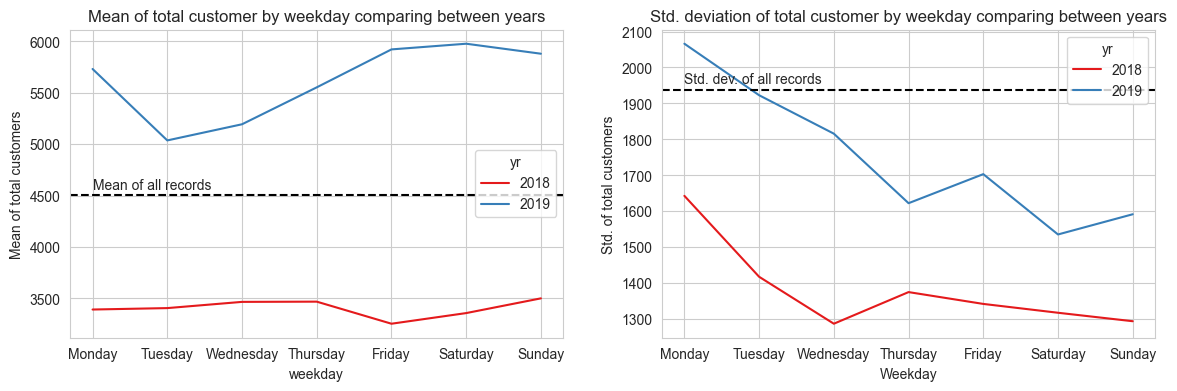

In [37]:
d_map = {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' :3, 'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6}
agg_df = df.groupby(by = ['yr', 'weekday'])['cnt'].agg(['mean', 'std']).reset_index()
agg_df['weekday_num'] = agg_df['weekday'].map(d_map)
agg_df.sort_values(by = ['yr', 'weekday_num'], ascending = True, inplace = True)

fig, axes = plt.subplots(1, 2, figsize = (14, 4))
sns.lineplot(data = agg_df, x = 'weekday', y = 'mean', hue = 'yr', palette = 'Set1', ax = axes[0])
sns.lineplot(data = agg_df, x = 'weekday', y = 'std', hue = 'yr', palette = 'Set1', ax = axes[1])

axes[0].set_title('Mean of total customer by weekday comparing between years')
axes[1].set_title('Std. deviation of total customer by weekday comparing between years')
axes[0].set_ylabel('Mean of total customers')
axes[1].set_ylabel('Std. of total customers')

axes[0].axhline(df['cnt'].mean(), linestyle = '--', color = 'black')
axes[1].axhline(df['cnt'].std(), linestyle = '--', color = 'black')

axes[0].annotate('Mean of all records', xy = (0, df['cnt'].mean() + 50))
axes[1].annotate('Std. dev. of all records', xy = (0, df['cnt'].std() + 20))

plt.xlabel('Weekday')
plt.show()

There is a clear separation in total consumers between the years. More consumers are opting for the BoomBikes rental services over the weekend. In the 2019, there is an exception, relatively more consumers also active on Monday as well. The distirbution is tighter in the weekend as well (starting Friday).

Note that the two lines shown in the respective plots are the mean and standard deviation of total customers count in the dataset. The mean clearly separates 2018 and 2019. The standard deviation of the dataset is significantly higher, and it might becuase of large variance in the end of 2019. And this also explain expection of higher mean total customer on Monday's in the year 2019.

While encoding, it is better to ecode start of the week on Tuesday rather than Monday for the above mentioned reason.

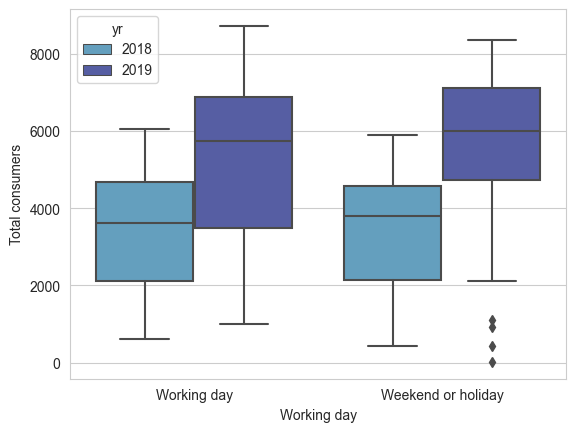

In [16]:
sns.boxplot(data = df, x = 'workingday', y = 'cnt', hue = 'yr')
plt.ylabel('Total consumers')
plt.xlabel('Working day')
plt.show()

The effect of working day on the consumers using the rental service is not evident from the above plot.

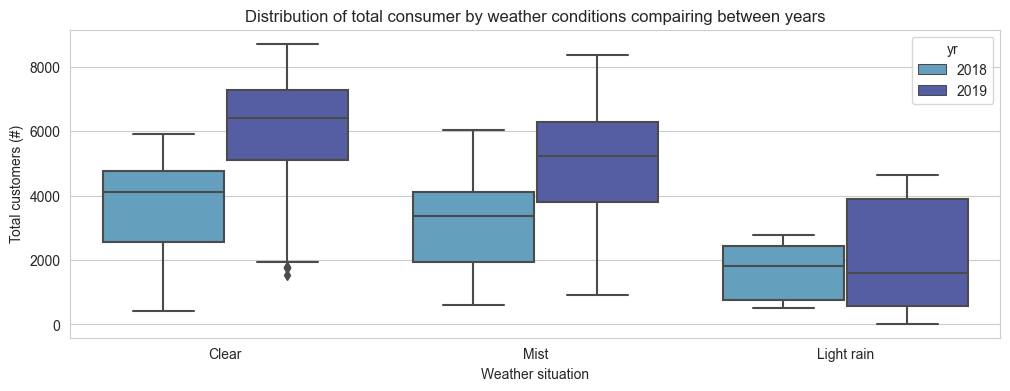

In [19]:
plt.figure(figsize=(12, 4))
sns.boxplot(data = df, x = 'weathersit', y = 'cnt', hue = 'yr', order = ['Clear', 'Mist', 'Light rain'])
plt.title('Distribution of total consumer by weather conditions compairing between years')
plt.xlabel('Weather situation')
plt.ylabel('Total customers (#)')
plt.show()

As expected, in the condusive conditions where the weather is clear, more consumers are opting for the services. Consumer activity is low when there is light rain, and it is consistant accross the two years. 

Note that the dataset do not have records when it rain heavily.

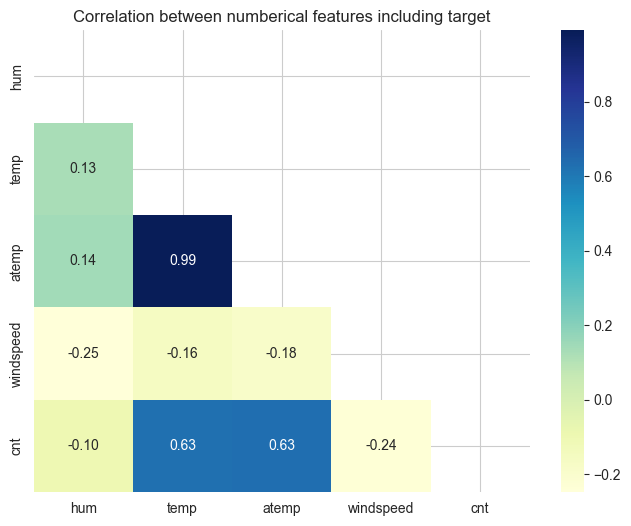

In [47]:
## Correlation plot
num_features = ['hum', 'temp', 'atemp', 'windspeed', 'cnt']
corr = df[num_features].corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (8, 6))
sns.heatmap(data = corr, mask = mask, cmap="YlGnBu", fmt='.2f', annot=True)
plt.title('Correlation between numberical features including target')
plt.show()

Atomospheric and feel temperatures are strongly correlated. We must either drop one of them, transform, or create a new feature with them. The total customer count is weakly correlated with the temperature. Relative humidity and windspeed are not correlated with either of the temperatures and also with the target (cnt).

Distribution of numerical features and interaction between them


<Figure size 1600x1000 with 0 Axes>

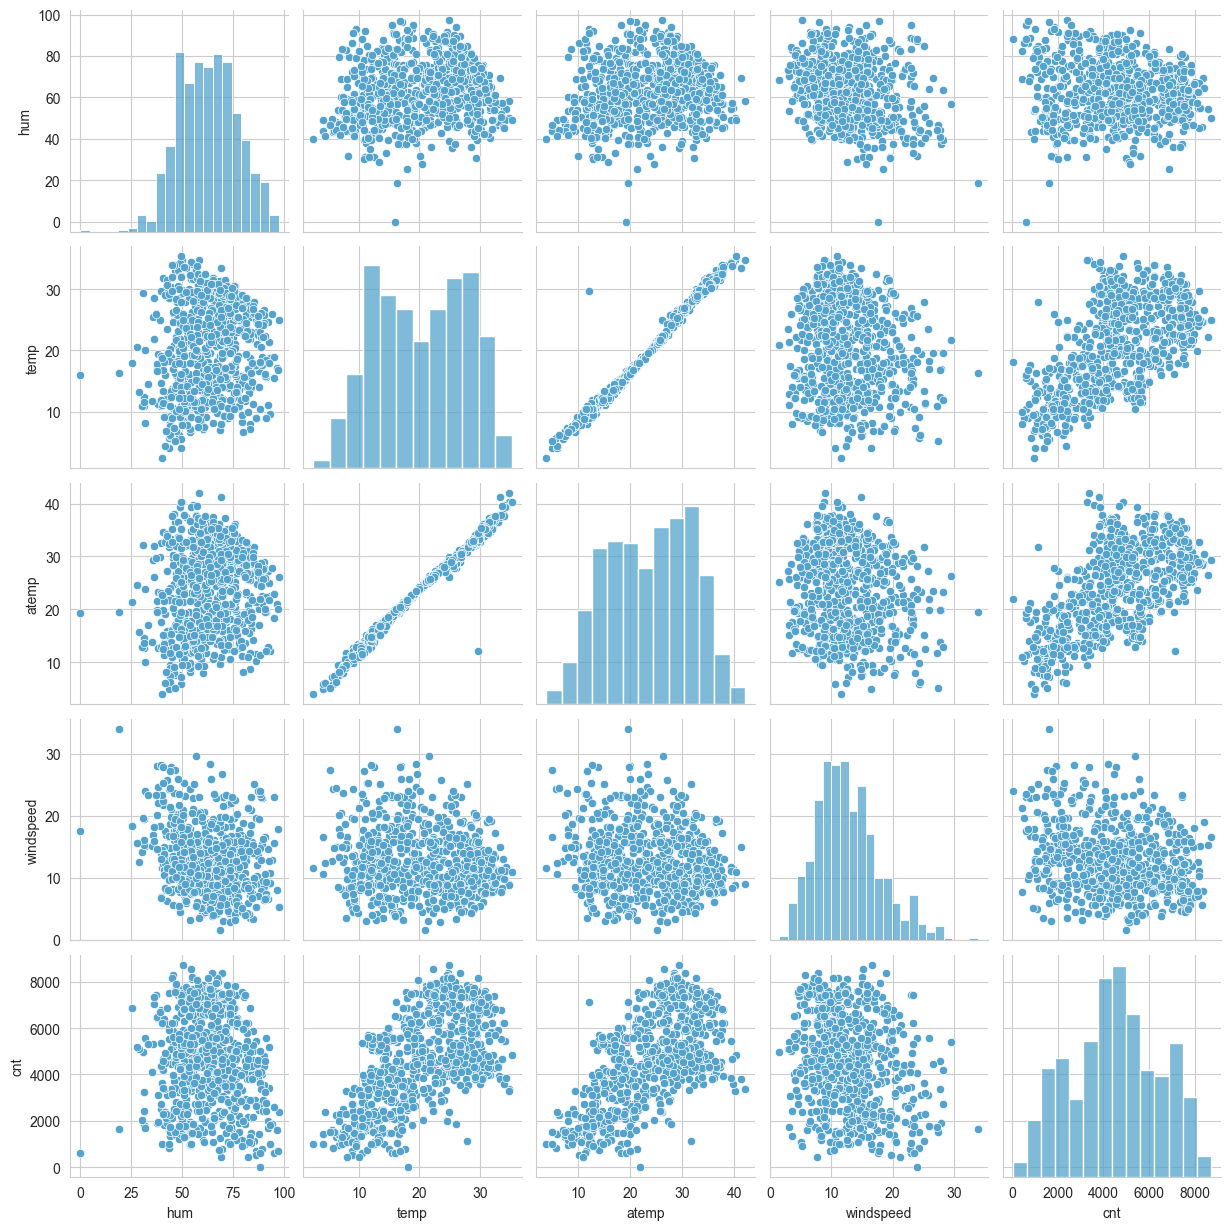

In [53]:
print('Distribution of numerical features and interaction between them')
plt.figure(figsize = (16, 10))
sns.pairplot(df[num_features])
plt.show()

Atomospheric and feel temperatures seems to have bimodal distribtion. We cannot observe clear trend among the features with the total customers (we already observed in the correlation plot). All the weather features have strong variance and it has to do with seasonal effects.

Investigating atomspheric temperature and feel temperature

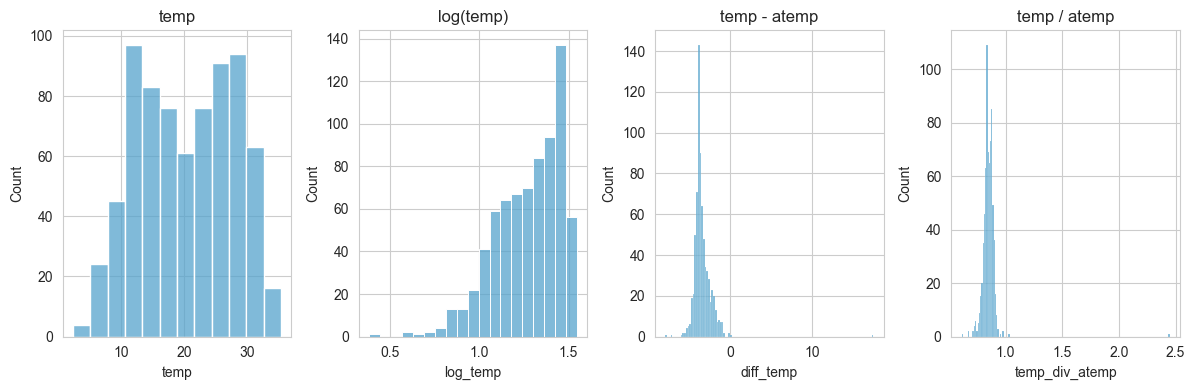

In [74]:
df['log_temp'] = df['temp'].apply(np.log10)
df['diff_temp'] = df['temp'] - df['atemp']
df['temp_div_atemp'] = df['temp'] / df['atemp']

fig, axes = plt.subplots(1, 4, figsize = (12 ,4))
sns.histplot(data = df, x = 'temp', ax = axes[0])
sns.histplot(data = df, x = 'log_temp', ax = axes[1])
sns.histplot(data = df, x = 'diff_temp', ax = axes[2])
sns.histplot(data = df, x = 'temp_div_atemp', ax = axes[3])

for i, title in enumerate(['temp', 'log(temp)', 'temp - atemp', 'temp / atemp']):
    axes[i].set_title(title)
plt.tight_layout()
plt.show()

- Feel temperature seems to be hgher than atmosphere temperature
- Log transformation shift the trend to left tail distribution
- Difference and division between the tempertures squezzes the distribution into normal.


### END